# Übungsblatt 2 (Deskriptive Statistik) - Grundkonzepte der Datenanalyse und Visualisierung WS 2024/25

Ziel dieses Übungsteils ist es, elementare Kenngrößen der beschreibenden Statistik mittels Pandas zu berechnen, sowie Diagramme zweier grundlegender Diagrammtypen (Histogramme und Scatterplots) zur Visualisierung der Verteilung von Datenpunkten mittels Matplotlib und Seaborn zu erstellen. Außerdem wird das Erstellen von Pivot-Tabellen wiederholt.

Für dieses Übungsblatt werden wir folgendene Imports benötigen:

In [1]:
# Wir beginnen mit den gewohnten Imports ...
import pandas as pd
import numpy as np

# ... und ergänzen diese um Imports, welche uns eine bessere Kontrolle der Plots erlauben
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

## Nobelpreise

Als erstes betrachten wir die bisherigen Nobelpreise. Unser Ziel ist es, die Anzahl an gewinnenden Personen/Organisationen anhand verschiedener Merkmale aufzuschlüsseln. Dafür werden wir eine etwas aufwändigere (verglichen mit Übungsblatt 1) Pivot-Tabelle erstellen.

**Beschreibung der Daten:**

Der Datensatz enthält 18 Merkmale, die wir hier nicht alle auflisten und beschreiben werden. Die meisten davon sind absolut selbsterklärend. 

Die Merkmale __Motivation__ und __Overall Motivation__ beziehen sich auf die Begründung für die Verleihung des Preises.


**Quelle:**

Wir verwenden die auf [https://public.opendatasoft.com/explore/dataset/nobel-prize-laureates/table/?disjunctive.category](https://public.opendatasoft.com/explore/dataset/nobel-prize-laureates/table/?disjunctive.category) veröffentlichten Daten (csv Download). Dort wird die _Nobel Media AB_ als veröffentlichende Einheit angegeben - was auch realistisch scheint. Die Daten sollten also korrekt sein. <br/>
Um den ursprünglich 250MB großen Datensatz zu reduzieren haben wir zwei Merkmale mit Geo-Informationen (Umrissdaten) aus dem Datensatz entfernt.


In [2]:
path_nobelp = 'Nobelpreise.csv'

df_nobelp = pd.read_csv(path_nobelp, sep=';', index_col=0)  # Wir verwenden die Id der Einträge als Index
print(df_nobelp.info())
df_nobelp

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 480 to 729
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Firstname             1000 non-null   object
 1   Surname               968 non-null    object
 2   Born                  956 non-null    object
 3   Died                  670 non-null    object
 4   Born country          969 non-null    object
 5   Born country code     969 non-null    object
 6   Born city             967 non-null    object
 7   Died country          657 non-null    object
 8   Died country code     657 non-null    object
 9   Died city             651 non-null    object
 10  Gender                1000 non-null   object
 11  Year                  1000 non-null   int64 
 12  Category              1000 non-null   object
 13  Overall motivation    23 non-null     object
 14  Motivation            1000 non-null   object
 15  Organization name     736 non-null    obje

,Firstname,Surname,Born,Died,Born country,Born country code,Born city,Died country,Died country code,Died city,Gender,Year,Category,Overall motivation,Motivation,Organization name,Organization city,Organization country
Id,,,,,,,,,,,,,,,,,,
480,Elihu,Root,1845-02-15,1937-02-07,USA,US,Clinton NY,USA,US,New York NY,male,1912,Peace,NaN,"""for bringing about better understanding betwe...",NaN,NaN,NaN
510,John,Boyd Orr,1880-09-23,1971-06-25,Scotland,GB,Kilmaurs,Scotland,GB,Edzell,male,1949,Peace,NaN,"""for his lifelong effort to conquer hunger and...",NaN,NaN,NaN
538,Anwar,al-Sadat,1918-12-25,1981-10-06,Egypt,EG,Mit Abu al-Kawm,Egypt,EG,Cairo,male,1978,Peace,NaN,"""for jointly having negotiated peace between E...",NaN,NaN,NaN
541,Adolfo,Pérez Esquivel,1931-11-26,NaN,Argentina,AR,Buenos Aires,NaN,NaN,NaN,male,1980,Peace,NaN,"""for being a source of inspiration to represse...",NaN,NaN,NaN
550,United Nations Peacekeeping Forces,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,org,1988,Peace,NaN,"""for preventing armed clashes and creating con...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,Bertha,von Suttner,1843-06-09,1914-06-21,Austrian Empire (now Czech Republic),CZ,Prague,Austria,AT,Vienna,female,1905,Peace,NaN,"""for her audacity to oppose the horrors of war""",NaN,NaN,NaN
552,Mikhail,Gorbachev,1931-03-02,2022-08-30,USSR (now Russia),RU,Privolnoye,Russia,RU,Moscow,male,1990,Peace,NaN,"""for the leading role he played in the radical...",NaN,NaN,NaN
703,Trygve,Haavelmo,1911-12-13,1999-07-26,Norway,NO,Skedsmo,Norway,NO,Oslo,male,1989,Economics,NaN,"""for his clarification of the probability theo...",University of Oslo,Oslo,Norway


Unser Ziel ist eine Pivot-Tabelle der folgenden Form (die Grafik enthält alle Merkmale, aber nicht alle Zeilen):

<img src="img/NobelPivottable.png" alt="Beispiel für Struktur der Tabelle" width="1000"/>

Wir möchten also die Anzahl der Preise pro Kategorie aufgeschlüsselt nach Geschlecht (bzw. ob eine Organisation den Preis erhalten hat - gerade beim Peace-Prize geschieht dies häufiger), sowie nach Land und noch lebende bzw. bereits gestorbene Personen.

### Einführen eines neuen Merkmals

Aktuell enthält der Datensatz die Informationen, ob jemand gestorben ist oder noch lebt, in einer für unsere Zwecke nur unzureichenden Art: Wir nehmen an, dass die Person gestorben ist, wenn es ein Sterbedatum gibt, und noch lebt, wenn der Datensatz kein Sterbedatum enthält. Nach dieser Information lässt sich aber nicht so einfach eine Pivot-Tabelle erstellen. Um dies möglichst einfach zu bewerkstelligen, richten wir uns daher zuerst ein neues Merkmal (__Alive__) ein, welches den String _'Alive'_ enthält falls wir für die Entität (Person/Organisation) kein Sterbedatum haben, und sonst den String _'Dead'_. 

Verwenden Sie zur Lösung dieser Aufgabe die Methode ```isna()``` von Pandas DataFrames ([API-Referenz](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html)).

In [3]:
## Fügen Sie dem DataFrame df_nobelp ein weiteres Merkmal mit dem Namen "Alive" hinzu
## Setzen Sie den Wert dieses neuen Merkmals zuerst für alle Einträge auf den Wert 
##  'Dead'
## Setzen Sie anschließend in allen Einträgen, die keinen Wert für das Merkmal 
##  'Died' 
## besitzen (wird als NaN behandelt), den Wert für das Merkmal "Alive" auf 'Alive'.
## Lösen Sie die Aufgabe mit Hilfe der DataFrame Methode isna()

df_nobelp["Alive"] = np.where(df_nobelp['Died'].isna(), 'Alive', 'Dead')
df_nobelp.head()

,Firstname,Surname,Born,Died,Born country,Born country code,Born city,Died country,Died country code,Died city,Gender,Year,Category,Overall motivation,Motivation,Organization name,Organization city,Organization country,Alive
Id,,,,,,,,,,,,,,,,,,,
480,Elihu,Root,1845-02-15,1937-02-07,USA,US,Clinton NY,USA,US,New York NY,male,1912,Peace,NaN,"""for bringing about better understanding betwe...",NaN,NaN,NaN,Dead
510,John,Boyd Orr,1880-09-23,1971-06-25,Scotland,GB,Kilmaurs,Scotland,GB,Edzell,male,1949,Peace,NaN,"""for his lifelong effort to conquer hunger and...",NaN,NaN,NaN,Dead
538,Anwar,al-Sadat,1918-12-25,1981-10-06,Egypt,EG,Mit Abu al-Kawm,Egypt,EG,Cairo,male,1978,Peace,NaN,"""for jointly having negotiated peace between E...",NaN,NaN,NaN,Dead
541,Adolfo,Pérez Esquivel,1931-11-26,NaN,Argentina,AR,Buenos Aires,NaN,NaN,NaN,male,1980,Peace,NaN,"""for being a source of inspiration to represse...",NaN,NaN,NaN,Alive
550,United Nations Peacekeeping Forces,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,org,1988,Peace,NaN,"""for preventing armed clashes and creating con...",NaN,NaN,NaN,Alive


In [4]:
assert type(df_nobelp["Alive"]) == pd.core.frame.Series, f'Merkmal "Alive" fehlt oder falsche Struktur: {type(df_nobelp["Alive"])}`'
assert df_nobelp["Alive"].dtype == object, f'Daten von Merkmal "Alive" haben falschen Datentyp {df_nobelp["Alive"].dtype}'
assert len(df_nobelp.columns) == 19, f'Anzahl der Merkmale von df_nobelp nicht wie erwartet: {len(df_nobelp.columns)}'

assert sorted(df_nobelp["Alive"].unique()) == ['Alive', 'Dead'], f'Das Merkmal Alive sollte nur die Werte Alive und Dead enthalten'

counts = df_nobelp["Alive"].value_counts() 
assert (counts["Alive"] == 330), f'Der Wert Alive sollte 330 mal im neuen Attribut auftreten: {counts["Alive"]}'
assert (counts["Dead"] == 670), f'Der Wert Alive sollte 670 mal im neuen Attribut auftreten: {counts["Dead"]}'


### Eine erste Pivot-Tabelle

Mit den nun in ```df_nobelp``` vorhandenen Informationen können wir die gewünschte Pivot-Tabelle bereits erstellen. Wir werden jedoch zuerst noch einen Zwischenschritt einlegen, um das Verhalten der Methode ```DataFrame.pivot_table()``` an einem kleineren Beispiel zu beobachten. 

Dazu erstellen wir eine Pivot-Tabelle mit nur einem einzelnen Merkmal. Diese Tabelle soll eine Übersicht darüber bieten, wie viele Personen (dies inkludiert Organisationen) welchen Geschlechts in welcher Kategorie bislang einen Preis gewonnen haben. Die Tabelle soll für jede Kategorie (__"Category"__) eine Zeile für jedes Geschlecht (__"Gender"__) enthalten, das mindestens einen Preis in dieser Kategorie erhalten hat. Das einzige Merkmal enthält dann die Anzahl der betreffenden Personen. Das Beispiel für die Kategorie 'Chemistry' ist hier zu sehen:

<img src="img/PivotTable1.png" alt="Beispiel für Struktur der Tabelle" width="230"/>

In [5]:
## Erstellen Sie eine Pivot-Tabelle mit der oben beschriebenen Struktur. 
## Der Name des einzigen Merkmals des DataFrames muss "# Prizes" sein.
## Das DataFrame darf keine Kombination (Kategorie, Geschlecht) enthalten
## in der noch nie jemand den Preis erhalten hat (das ist das 
## Standardverhalten der Methode DataFrame.pivot_table).
## Speichern Sie eine Referenz auf die Pivot-Tabelle in einer Variablen
## mit dem Namen df_nobel_small_summary

df_nobel_small_summary = df_nobelp.pivot_table(index=['Category','Gender'], values='Firstname', aggfunc='count')
df_nobel_small_summary.rename(columns={'Firstname' : '# Prizes'}, inplace=True)
print(df_nobel_small_summary.info)

<bound method DataFrame.info of                    # Prizes
Category   Gender          
Chemistry  female         8
           male         186
Economics  female         3
           male          90
Literature female        17
           male         103
Medicine   female        13
           male         214
Peace      female        19
           male          92
           org           30
Physics    female         5
           male         220>


In [6]:
assert df_nobel_small_summary.columns == ["# Prizes"], f'Falsche Anzahl an Merkmalen oder falscher Name: {df_nobel_small_summary.columns}'

assert len(df_nobel_small_summary.index) == 13, f'Falsche Anzahl an Einträgen: {len(df_nobel_small_summary.index)}'
assert len(df_nobel_small_summary[df_nobel_small_summary["# Prizes"] < 1].index) == 0, f'Das Ergebnis sollte keinen Eintrag mit 0 besitzen'

assert sorted(df_nobel_small_summary.index.levels[0]) == ['Chemistry', 'Economics', 'Literature', 'Medicine', 'Peace', 'Physics'], \
                                f'Unerwartete Werte für Index (Category): {sorted(df_nobel_small_summary.index.levels[0])}'



Bei Betrachtung der resultierenden Pivot-Tabelle stellen wir fest, dass nicht alle Kategorien die gleiche Anzahl an Zeilen besitzen: In allen Kategorien gibt es zwei Zeilen für die Geschlechter _'female'_ und _'male'_, nur beim Friedensnobelpreis gibt es ein drittes Geschlecht _'org'_. Es lässt sich leicht überprüfen, dass der Grund, dass dieser dritte Eintrag bei den anderen Preisen fehlt, ist, dass diese nie an eine Organisation vergeben wurden:

In [7]:
print(f'Es haben bislang {len(df_nobelp[(df_nobelp["Category"]!="Peace") & (df_nobelp["Gender"]=="org")].index)} Organisationen einen Nobelpreis gewonnen, der nicht der Friedensnobelpreis war.')

Es haben bislang 0 Organisationen einen Nobelpreis gewonnen, der nicht der Friedensnobelpreis war.


Wir möchten jedoch, dass es zu allen Preiskategorien die selbe Anzahl an Einträgen gibt - also eine Zeile __org__ für jede Preiskategorie. Falls noch keine Organisation den Preis gewonnen hat, soll dort einfach die Zahl 0 stehen. 

Werfen Sie dafür einen Blick auf die möglichen Argumente von ```DataFrame.pivot_table()``` [Link zur API-Referenz](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html), und lösen Sie die Aufgabe mit Hilfe dieser Funktion.

In [8]:
## Erstellen Sie eine Pivot-Tabelle mit der oben beschriebenen Struktur. 
## Der Name des einzigen Merkmals des DataFrames muss "# Prizes" sein.
## Das DataFrame soll nun auch Kombinationen (Kategorie, Geschlecht) 
## enthalten, in der noch nie jemand den Preis erhalten hat - fehlende
## Werte sollen durch 0 ersetzt werden.
## WICHTIG: Lösen Sie die Aufgabe nur mittels der Methode pivot_table() 
## des DataFrames (umbenennen von Merkmalen ist ebenfalls erlaubt) 
## Speichern Sie eine Referenz auf die Pivot-Tabelle in einer Variablen
## mit dem Namen df_nobel_complete_summary

df_nobel_complete_summary = df_nobelp.pivot_table(index=['Category', 'Gender'], values='Firstname', aggfunc='count', fill_value=0, dropna=False)
df_nobel_complete_summary.rename(columns={'Firstname' : '# Prizes'}, inplace=True)
print(df_nobel_complete_summary.info)
df_nobel_complete_summary.head()

<bound method DataFrame.info of                    # Prizes
Category   Gender          
Chemistry  female         8
           male         186
           org            0
Economics  female         3
           male          90
           org            0
Literature female        17
           male         103
           org            0
Medicine   female        13
           male         214
           org            0
Peace      female        19
           male          92
           org           30
Physics    female         5
           male         220
           org            0>


# Prizes
Category  Gender          
Chemistry female         8
          male         186
          org            0
Economics female         3
          male          90

In [9]:
assert df_nobel_complete_summary.columns == ["# Prizes"], f'Falsche Anzahl an Merkmalen oder falscher Name: {df_nobel_complete_summary.columns}'

assert len(df_nobel_complete_summary.index) == 18, f'Falsche Anzahl an Einträgen: {len(df_nobel_complete_summary.index)}'
assert len(df_nobel_complete_summary[df_nobel_complete_summary["# Prizes"] < 1].index) == 5, \
    f'Das Ergebnis sollte 5 Einträge mit 0 besitzen: {len(df_nobel_complete_summary[df_nobel_complete_summary["# Prizes"] < 1].index)}'

assert sorted(df_nobel_complete_summary.index.levels[0]) == ['Chemistry', 'Economics', 'Literature', 'Medicine', 'Peace', 'Physics'], \
                                f'Unerwartete Werte für Index (Category): {sorted(df_nobel_complete_summary.index.levels[0])}'



### Abschließende Pivot-Tabelle

Damit haben wir nun alles zusammen, was wir zum Erstellen der gewünschten Pivot-Tabelle benötigen. Hier noch einmal das Ziel:

<img src="img/NobelPivottable.png" alt="Beispiel für Struktur der Tabelle" width="1000"/>


In [10]:
## - Erstellen Sie eine Pivot-Tabelle der oben dargestellten Form
## - Sowohl der Zeilen- als auch der Spaltenindex sind Zweidimensional. 
##   . Die Spalten gruppieren zuerst nach der Kategorie und anschließend nach dem Geschlecht
##   . Die Zeilen gruppieren nach dem Geburtsland und anschließend nach Lebend oder Verstorben.
## - Die Einträge in der Tabelle geben die Anzahl der Einträge in df_nobelp wieder, die in 
## die entsprechende Gruppe fallen.
## - Die Tabelle soll auch Spalten und Zeilen enthalten, zu denen es keinen entsprechenden 
## Eintrag in den Daten gibt - die Werte sollten mit 0 befüllt sein.
## 
## Speichern Sie eine Referenz auf das Ergebnis in der Variablen df_nobel_summary

df_nobel_summary=df_nobelp.pivot_table(index=['Born country', 'Alive'],columns=['Category', 'Gender'], values='Firstname', aggfunc='count', dropna=False, fill_value=0)
df_nobel_summary.head()

Category           Chemistry          Economics          Literature           \
Gender                female male org    female male org     female male org   
Born country Alive                                                             
Argentina    Alive         0    0   0         0    0   0          0    0   0   
             Dead          0    0   0         0    0   0          0    0   0   
Australia    Alive         0    0   0         0    0   0          0    0   0   
             Dead          0    1   0         0    0   0          0    0   0   
Austria      Alive         0    1   0         0    0   0          1    1   0   

Category           Medicine           Peace          Physics           
Gender               female male org female male org  female male org  
Born country Alive                                                     
Argentina    Alive        0    0   0      0    1   0       0    0   0  
             Dead         0    2   0      0    1   0       0    0   0  
Australia    Alive        1    3   0      0    0   0       0    0   0  
             Dead         0    3   0      0    0   0       0    2   0  
Austria      Alive        0    1   0      0    0   0       0    1   0

In [11]:
# Struktur des Ergebnisses:
assert len(df_nobel_summary.columns) == 18, f'Unerwartete Anzahl an Spalten im DataFrame: {len(df_nobel_summary.columns)}'
assert len(df_nobel_summary.index) == 256, f'Unerwartete Anzahl an Einträgen im DataFrame: {len(df_nobel_summary.index)}'

assert sorted(df_nobel_summary.columns.levels[0]) == ['Chemistry', 'Economics', 'Literature', 'Medicine', 'Peace', 'Physics'], \
                                f'Unerwartete Werte für Columns (Category): {sorted(df_nobel_summary.columns.levels[0])}'

assert len(df_nobel_summary.index.levels[0]) == 127, \
                                f'Unerwartete Anzahl an Werten für Index (Born country): {len(df_nobel_summary.index.levels[0])}'

# 4 Werte probeweise
assert df_nobel_summary.loc[("the Netherlands", "Alive"), ("Physics", "male")] == 1, \
                                f'Unerwartetes Ergebnis für ("the Netherlands", "Alive"), ("Physics", "male"): ' + \
                                f'{df_nobel_summary.loc[("the Netherlands", "Alive"), ("Physics", "male")]}'
assert df_nobel_summary.loc[("West Germany (now Germany)",  "Dead"), ("Literature", "male")] == 0, \
                                f'Unerwartetes Ergebnis für ("West Germany (now Germany)",  "Dead"), ("Literature", "male"): ' +  \
                                f'{df_nobel_summary.loc[("West Germany (now Germany)",  "Dead"), ("Literature", "male")]}'
assert df_nobel_summary.loc[("Australia",  "Alive"), ("Medicine", "female")] == 1, \
                                f'Unerwartetes Ergebnis für ("Australia",  "Alive"), ("Medicine", "female"): ' +  \
                                f'{df_nobel_summary.loc[("Australia",  "Alive"), ("Medicine", "female")]}'
assert df_nobel_summary.loc[(np.NaN,  "Alive"), ("Peace", "org")] == 30, \
                                f'Unerwartetes Ergebnis für (np.NaN,  "Alive"), ("Peace", "org"): ' +  \
                                f'{df_nobel_summary.loc[(np.NaN,  "Alive"), ("Peace", "org")]}'




Der standardmäßig angezeigte Ausschnitt des DataFrames schneidet genau bei Östrreich ab. Wir suchen uns daher die Einträge für ein paar Länder heraus, und lassen uns die Ergebnisse anzeigen.

In [12]:
## Erstellen Sie eine Liste (Python-Liste) mit allen verfügbaren Ländern, die Sie wählen könnten. 
## Sie können die Werte entweder aus df_nobelp nehmen (das geht mit den uns bekannten Methoden).
## Wenn Sie die Werte direkt aus dem Index von df_nobel_summary sammeln wollen ist dies auch 
## möglich - hierzu empfiehlt sich die Dokumentation des MultiIndex 
## https://pandas.pydata.org/docs/user_guide/advanced.html
## sowie insbesondere der Methode get_level_values()
## https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.get_level_values.html
## Speichern Sie eine Referenz auf die Liste (Achtung: Python-Liste, kein Index Objekt, 
## kein Series Objekt, oä. 
## in der Variable 'countries'
## 
## Filtern Sie aus df_nobel_summary die Einträge für Österreich ('Austria') und mindestens zwei weitere Länder Ihrer Wahl heraus.
## Speichern Sie eine Referenz auf das resultierende verkleinerte DataFrame in der Variablen df_my_summary.
## Das DataFrame in df_nobel_summary darf nicht verändert werden.

countries = list(set(df_nobelp['Born country']))
print('Länderauswahl:', sorted(countries,key=str))
df_my_summary = df_nobel_summary.loc[['Austria', 'Russia', 'China']]
df_my_summary.head()

Länderauswahl: ['Argentina', 'Australia', 'Austria', 'Austria-Hungary (now Austria)', 'Austria-Hungary (now Bosnia and Herzegovina)', 'Austria-Hungary (now Croatia)', 'Austria-Hungary (now Czech Republic)', 'Austria-Hungary (now Hungary)', 'Austria-Hungary (now Poland)', 'Austria-Hungary (now Slovenia)', 'Austria-Hungary (now Ukraine)', 'Austrian Empire (now Austria)', 'Austrian Empire (now Czech Republic)', 'Austrian Empire (now Italy)', 'Bavaria (now Germany)', 'Belgian Congo (now Democratic Republic of the Congo)', 'Belgium', 'Bosnia (now Bosnia and Herzegovina)', 'Brazil', 'British India (now Bangladesh)', 'British India (now India)', 'British Mandate of Palestine (now Israel)', 'British Protectorate of Palestine (now Israel)', 'British West Indies (now Saint Lucia)', 'Bulgaria', 'Burma (now Myanmar)', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Crete (now Greece)', 'Cyprus', 'Czechoslovakia (now Czech Republic)', 'Denmark', 'East Friesland (now Germany)', 'East Timor', 

Category           Chemistry          Economics          Literature           \
Gender                female male org    female male org     female male org   
Born country Alive                                                             
Austria      Alive         0    1   0         0    0   0          1    1   0   
             Dead          0    2   0         0    1   0          0    0   0   
Russia       Alive         0    0   0         0    0   0          0    0   0   
             Dead          0    3   0         0    2   0          0    4   0   
China        Alive         0    0   0         0    0   0          0    2   0   

Category           Medicine           Peace          Physics           
Gender               female male org female male org  female male org  
Born country Alive                                                     
Austria      Alive        0    1   0      0    0   0       0    1   0  
             Dead         0    4   0      0    1   0       0    3   0  
Russia       Alive        0    0   0      0    1   0       0    2   0  
             Dead         0    1   0      0    1   0       0    4   0  
China        Alive        1    0   0      0    0   0       0    3   0

In [13]:
# countries
assert len(countries) == 128, f'Es sollten 128 Länder sein: {len(countries)}'
assert 'Spain' in countries, 'Spain fehlt'
assert 'Ethiopia' in countries, 'Ethiopia fehlt'
assert 'Czechoslovakia (now Czech Republic)' in countries, 'Czechoslovakia (now Czech Republic)'
assert 'Russian Empire (now Poland)' in countries, 'Russian Empire (now Poland) fehlt'

# df_my_summary

assert len(df_my_summary.index) >= 6, f'Es waren die Werte von mindestens 3 Ländern(= mind. 6 Zeilen) gefragt'
assert len(df_my_summary.columns) == 18, f'DataFrame hat nicht genügend Columns'
assert (sorted(df_my_summary.index.levels[1]) == ['Alive', 'Dead']), f'Zweiter Level des Index mit unerwarteten Werten: \
                                {df_my_summary.index.levels[1]}'
assert 'Austria' in df_my_summary.index.levels[0], f'Österreich muss im Ergebnis enthalten sein'


## Nutzungsdaten einer Bibliothek

*Ein Bekannter von Ihnen arbeitet als Lehrer und möchte seine Schüler:innen zum Lesen motivieren. Seine bisherigen Versuche waren leider nicht sehr erfolgreich. Als eine Maßnahme besucht er mit seiner Klasse monatlich die örtliche Bibliothek. Um die Kinder zur Ausleihe der Bücher zu motivieren, schlagen Sie ihm vor, ein kompetitives Element in den Bibliotheksbesuch einzubauen: einfach nur lesen ist "langweilig" - mehr gelesen zu haben als andere ist etwas, womit man angeben kann :-)*

Wir betrachten den Datensatz einer Bibliothek, um zu erkennen, wo im "Ranking" der Anzahl an ausgeliehenen (und damit natürlich auch gelesenen) Büchern sich die Kinder befinden. Dazu werden wir einige Kenngrößen der beschreibenden Statistik auf dem Datensatz berechnen. 

**Beschreibung der Daten:**

Wir werden bei weitem nicht alle Informationen des Datensatzes benötigen, haben ihn aber nicht ausschließlich auf die benötigten Merkmale reduziert.

- __Patron Type Definition:__ Beschreibt die Kategorie, in welche die Person eingeteilt wurde/um welche Art von Kund:in es sich handelt.
- __Total Checkouts:__ Die Anzahl der durch die Person ausgeliehenen Bücher
- __Total Renewals:__ Die Anzahl der insgesamt von der Person durchgeführten Verlängerungen von Ausleihen
- __Age Range:__ Die Altersklasse der Person
- __Circulation Active Month:__ Monat in dem die Person/Karte zuletzt aktiv war
- __Circulation Active Year:__ Jahr in dem die Person/Karte zuletzt aktiv war
- __Year Patron Registered:__ Das Jahr in dem sich die Person in der Bibliothek angemeldet hat

**Datenquelle:**

[https://www.kaggle.com/datasets/datasf/sf-library-usage-data](https://www.kaggle.com/datasets/datasf/sf-library-usage-data)

Laut Beschreibung enthält der Datensatz anonymisierte Nutzungsdaten der San Francisco Library. Ob es sich dabei tatsächlich um die behaupteten Daten handelt, ist für uns natürlich nicht überprüfbar (und für den eigentlichen Zweck der Übung auch egal). 
Der Grund, weshalb wir Daten aus San Francisco nehmen, ist, dass wir für Wien (oder Österreich allgemein) leider nur aggregierte Statistiken (Anzahl der Ausleihen pro Monat/pro Jahr) finden konnten. Im verwendeten Datensatz sind die Informationen auf Ebene einzelner Kund:innen verfügbar.

Bearbeitung: Um die Größe des Datensatzes zu verringern wurden 30% der Einträge des originalen Datensatzes zufällig ausgewählt, sowie die 50 Einträge mit den meisten Ausleihen und Verlängerungen (ein Eintrag kommt in beiden Kategorien vor, daher in Summe nur 99 Einträge auf diese Weise ausgewählt). Die Entscheidung, die 50 meisten Ausleihen und Verlängerungen im verkleinerten Datensatz zu behalten, skewed den Datensatz zwar etwas in Richtung höherer Werte für Ausleihen und Verlängerungen, aber erstens enthält der reduzierte Datensatz immer noch 127105 Einträge - die 99 Einträge sollten also nicht so stark ins Gewicht fallen. Und zweitens wollen wir ja, dass die Kinder viel lesen :-)

In [14]:
library_path = 'SanFranciscoLibrary_reduced.csv'

df_library_usage = pd.read_csv(library_path, sep=';')
df_library_usage

,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Circulation Active Month,Circulation Active Year,Year Patron Registered
0,ADULT,10,8,25 to 34 years,February,2013.0,2012
1,ADULT,0,0,25 to 34 years,NaN,NaN,2013
2,SENIOR,0,0,65 to 74 years,NaN,NaN,2010
3,ADULT,195,188,45 to 54 years,July,2016.0,2008
4,JUVENILE,290,15,0 to 9 years,December,2015.0,2013
...,...,...,...,...,...,...,...
127100,SENIOR,9358,31,65 to 74 years,June,2016.0,2007
127101,SENIOR,9340,24,65 to 74 years,July,2016.0,2003
127102,ADULT,9215,108,60 to 64 years,July,2016.0,2006
127103,ADULT,9205,18,45 to 54 years,July,2016.0,2003


### Beschreibende Statistik: Verteilung der Ausleihen

_Um den Ehrgeiz der Kinder durch das Erreichen gewisser Mengen gelesener Bücher zu steigern, berechnen wir einige statistische Kennzahlen aus dem DataFrame ```df_library_usage```._

Konkret interessieren uns die folgenden Fragen:
- Wie viele Bücher muss ein Kind mindestens ausborgen, damit es mehr Bücher ausgeborgt hat als ein Viertel (25%) der Kund:innen?
- Wie viele Bücher muss ein Kind mindestens ausborgen, damit es mehr Bücher ausgeborgt hat als die Hälfte der Kund:innen?
- Wie viele Bücher muss ein Kind mindestens ausborgen, damit es mehr Bücher ausgeborgt hat als drei Viertel (75%) der Kund:innen?
- Wie viele Bücher muss ein Kind mindestens ausborgen, damit es zu den Top 15% der Kund:innen gehört?
- Was ist die durchschnittliche Anzahl ausgeborgter Bücher aller Kund:innen?
- Was ist die Standardabweichung von diesem Wert?
- Was ist die kleinste und größte Anzahl an ausgeborgten Büchern einer Person?
- Was ist die Differenz zwischen diesen Werten?

Die Werte sollen in einem Dataframe ```df_library_stats``` gespeichert werden, dessen Struktur unten genauer beschrieben wird.

In [83]:
## Erstellen Sie das zuvor beschriebene DataFrame df_library_stats.
## Achten Sie darauf, dass es sich beim Ergebnis um ein DataFrame (keine Series) handelt, welche eine Spalte mit der
## Bezeichnung 'Total Checkouts' besitzt, sowie folgende Zeilen (Wert in Klammer gibt den Wert des Index für diese Zeile an):
## - (Kund:innen) die Anzahl der Personen im Datensatz
## - (Top 75%) Mindestanzahl an ausgeliehenen Büchern, um zu den Top-75% der Ausleihen zu gehören
## - (Top 50%) Mindestanzahl an ausgeliehenen Büchern, um zu jener Hälfte der Kund:innen zu gehören, die mehr ausgeborgt haben als die andere Hälfte.
## - (Top 25%) Mindestanzahl an ausgeliehenen Büchern, um zu den Top-25% der Ausleihen zu gehören
## - (Top 15%) Mindestanzahl an ausgeliehenen Büchern, um zu den Top-15% der Ausleihen zu gehören
## - (avgCheckouts) die durchschnittliche Anzahl an Ausleihen über alle Kund:innen
## - (std) die Standardabweichung dieses Werts
## - (minCheckouts) die kleinste Anzahl an Büchern die eine Person ausgeliehen hat
## - (maxCheckouts) die größte Anzahl an Büchern die eine Person ausgeliehen hat
## - (span) die Spannweite der Anzahl der Ausleihen
## 
## Das DataFrame darf weitere Zeilen enthalten, auch die Reihenfolge der Einträge spielt keine Rolle.

co_col = "Total Checkouts"

df_library_stats = pd.DataFrame({co_col : [np.nan]}, 
                                index=["Kund:innen", "Top 75%", "Top 50%", "Top 25%", "Top 15%", "avgCheckouts", "std", "minCheckouts", "maxCheckouts", "span"])

df_library_stats.loc["Kund:innen", co_col] = df_library_usage["Patron Type Definition"].count()
df_library_stats.loc["Top 75%", co_col] = df_library_usage["Total Checkouts"].quantile(0.25)
df_library_stats.loc["Top 50%", co_col] = df_library_usage["Total Checkouts"].quantile(0.5)
df_library_stats.loc["Top 25%", co_col] = df_library_usage["Total Checkouts"].quantile(0.75)
df_library_stats.loc["Top 15%", co_col] = df_library_usage["Total Checkouts"].quantile(0.85)
df_library_stats.loc["avgCheckouts", co_col] = (df_library_usage["Total Checkouts"].sum() / df_library_usage["Total Checkouts"].count()).round()
df_library_stats.loc["std", co_col] = df_library_usage["Total Checkouts"].std()
df_library_stats.loc["minCheckouts", co_col] = df_library_usage["Total Checkouts"].min()
df_library_stats.loc["maxCheckouts", co_col] = df_library_usage["Total Checkouts"].max()
df_library_stats.loc["span", co_col] = df_library_stats.loc["maxCheckouts", co_col] - df_library_stats.loc["minCheckouts", co_col]

df_library_stats.head()
df_library_stats.tail()

,Total Checkouts
avgCheckouts,167.000000
std,508.105626
minCheckouts,0.000000
maxCheckouts,35907.000000
span,35907.000000


In [84]:
# Einträge
assert len(df_library_stats.index) >= 10, f'Es fehlen vermutlich ein paar der zu berechnenden Werte'
assert {"Kund:innen", "Top 75%", "Top 50%", "Top 25%", "Top 15%", "avgCheckouts", "std", "minCheckouts", "maxCheckouts", "span"} <= set(df_library_stats.index.values), \
                        f'Entweder es fehlen ein paar der zu berechnenden Werte, oder die Namen stimmen nicht {df_library_stats.index.values}'

# Merkmale
assert [c for c in df_library_stats.columns] == ["Total Checkouts"], f' Die Merkmale des DataFrames scheinen nicht zu stimmen.'



Bei Betrachtung der Werte fallen schon ein paar Dinge ins Auge:

- Die Spannweite ist nicht sonderlich interessant - die werden wir im folgenden nicht mehr beachten
- Nur zwei Bücher lesen zu müssen, um schon mehr gelesen zu haben als 25% der Kund:innen ist uns etwas zu wenig - wir hätten gerne dass die Kinder etwas mehr lesen müssen um dieses Achievement zu erreichen.
- Die maximale Anzahl an Ausleihen ist ... groß. Das wollen wir uns näher anschauen.

Wir beginnen, uns dem Problem mit den 2 Büchern für Top-75% anzunehmen. Die Idee dafür ist relativ simpel: Wir ignorieren alle Personen, die noch überhaupt kein Buch ausgeliehen haben - die stellen keine wirkliche Herausforderung dar :-) - und berechnen die Kenngrößen für die verbleibenden Einträge erneut. 

Allerdings diesmal nicht nur für die Ausleihen, sondern auch für die Verlängerungen.

In [85]:
## Berechnen Sie die selben Kenngrößen wie zuvor - mit Ausnahme der Spannweite, diese braucht nicht mehr berechnet werden.
## Berechnen Sie die Werte jedoch nicht auf dem gesamten Datensatz in df_library_usage, sondern nur für jene 
## Einträge mit einem Wert > 0 für das Merkmal "Total Checkouts"
## Berechnen Sie die Kenngrößen außerdem nicht nur für das Merkmal "Total Checkouts", sondern auch für 
## das Merkmal "Total Renewals". 
## Das Ergebnis ist dieses mal also ein DataFrame mit zwei Spalten (Merkmalen): eines mit dem Namen 
## "Total Checkouts" und eines mit dem Namen "Total Renewals".
## Speichern Sie eine Referenz auf das DataFrame in der Variablen df_library_active_stats

cols = ["Total Checkouts", "Total Renewals"]

df_library_active_stats = pd.DataFrame(np.nan, 
                                       index=["Kund:innen", "Top 75%", "Top 50%", "Top 25%", "Top 15%", "avgCheckouts", "std", "minCheckouts", "maxCheckouts"], 
                                       columns=cols)

count_checkouts = df_library_usage[df_library_usage["Total Checkouts"] > 0]["Total Checkouts"].count()
df_library_active_stats.loc["Kund:innen", cols[0]] = count_checkouts
df_library_active_stats.loc["Top 75%", cols[0]] = df_library_usage[df_library_usage["Total Checkouts"] > 0]["Total Checkouts"].quantile(0.25)
df_library_active_stats.loc["Top 50%", cols[0]] = df_library_usage[df_library_usage["Total Checkouts"] > 0]["Total Checkouts"].quantile(0.5)
df_library_active_stats.loc["Top 25%", cols[0]] = df_library_usage[df_library_usage["Total Checkouts"] > 0]["Total Checkouts"].quantile(0.75)
df_library_active_stats.loc["Top 15%", cols[0]] = df_library_usage[df_library_usage["Total Checkouts"] > 0]["Total Checkouts"].quantile(0.85)
df_library_active_stats.loc["avgCheckouts", cols[0]] = (df_library_usage[df_library_usage["Total Checkouts"] > 0]["Total Checkouts"].sum() / df_library_active_stats.loc["Kund:innen", cols[0]]).round()
df_library_active_stats.loc["std", cols[0]] = df_library_usage[df_library_usage["Total Checkouts"] > 0]["Total Checkouts"].std() 
                                                       
df_library_active_stats.loc["minCheckouts", cols[0]] = df_library_usage[df_library_usage["Total Checkouts"] > 0]["Total Checkouts"].min()
df_library_active_stats.loc["maxCheckouts", cols[0]] = df_library_usage["Total Checkouts"].max()

df_library_active_stats.loc["Kund:innen", cols[1]] = df_library_usage["Total Renewals"].count()
df_library_active_stats.loc["Top 75%", cols[1]] = df_library_usage[cols[1]].quantile(0.25)
df_library_active_stats.loc["Top 50%", cols[1]] = df_library_usage[cols[1]].quantile(0.5)
df_library_active_stats.loc["Top 25%", cols[1]] = df_library_usage[cols[1]].quantile(0.75)
df_library_active_stats.loc["Top 15%", cols[1]] = df_library_usage[cols[1]].quantile(0.85)
df_library_active_stats.loc["avgCheckouts", cols[1]] = (df_library_usage[cols[1]].sum() / df_library_usage["Total Checkouts"].count()).round()
df_library_active_stats.loc["std", cols[1]] = df_library_usage[cols[1]].std()
df_library_active_stats.loc["minCheckouts", cols[1]] = df_library_usage[cols[1]].min()
df_library_active_stats.loc["maxCheckouts", cols[1]] = df_library_usage[cols[1]].max()

df_library_active_stats.tail()

,Total Checkouts,Total Renewals
Top 15%,332.000000,72.000000
avgCheckouts,202.000000,62.000000
std,552.818675,252.227501
minCheckouts,1.000000,0.000000
maxCheckouts,35907.000000,8965.000000


In [86]:
# Einträge
assert len(df_library_active_stats.index) >= 9, f'Es fehlen vermutlich ein paar der zu berechnenden Werte'
assert {"Kund:innen", "Top 75%", "Top 50%", "Top 25%", "Top 15%", "avgCheckouts", "std", "minCheckouts", "maxCheckouts"} <= set(df_library_active_stats.index.values), \
                        f'Entweder es fehlen ein paar der zu berechnenden Werte, oder die Namen stimmen nicht {df_library_active_stats.index.values}'

# Merkmale
assert sorted([c for c in df_library_active_stats.columns]) == ["Total Checkouts", "Total Renewals"], f' Die Merkmale des DataFrames scheinen nicht zu stimmen.'



Ok, 8 Bücher für das erste Achievement lesen zu müssen, klingt schon besser :-)

Als nächstes versuchen wir ein bisschen etwas über die Person herauszufinden, die hinter den Extremwerten an Ausleihen steckt - bzw. auch, ob das eine Ausnahme ist, oder ob es mehrere so hohe Ausleihen gibt.

### Untersuchen der Extremwerte

Wir sehen, dass sowohl bei den Ausleihen als auch bei den Verlängerungen die Maximalwerte ziemlich extreme Werte (verglichen z.B. mit den Mittelwerten oder auch 75% Quantil; aber auch wenn man sich einfach überlegt, was das an Büchern bedeutet). Im ersten Schritt suchen wir uns also die Einträge heraus, welche diese Extremwerte aufweisen.

In [87]:
## Suchen Sie aus dem DataFrame df_library_usage alle Einträge heraus, welche entweder in 
## "Total Checkouts" die größte Anzahl an Ausleihen aufweist, oder in 
## "Total Renewals" die größte Anzahl an Verlängerungen.
## 
## Suchen Sie diese Einträge dynamisch - d.h. kodieren Sie nicht die Anzahl der maximalen Werte 
## fest in Ihre Lösung ein, sondern ermitteln Sie diese als Teil Ihrer Lösung. 
## 
## Speichern Sie eine Referenz auf das resultierende DataFrame in einer Variable 
## df_to_beat 


max_checkouts_rows = df_library_usage[df_library_usage["Total Checkouts"] == df_library_usage["Total Checkouts"].max()]
max_renewals_rows = df_library_usage[df_library_usage["Total Renewals"] == df_library_usage["Total Renewals"].max()]

df_to_beat = pd.concat([max_checkouts_rows, max_renewals_rows]).drop_duplicates()

df_to_beat.head()

,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Circulation Active Month,Circulation Active Year,Year Patron Registered
127055,ADULT,35907,116,35 to 44 years,July,2016.0,2003
127006,ADULT,8210,8965,25 to 34 years,July,2016.0,2003


In [88]:
# Die Merkmale sollten gleich sein wie zuvor
assert (df_to_beat.columns == df_library_usage.columns).all(), 'Merkmale stimmen nicht überein'
assert sorted(df_to_beat.columns) == ['Age Range', 'Circulation Active Month', 'Circulation Active Year', 
            'Patron Type Definition', 'Total Checkouts', 'Total Renewals', 'Year Patron Registered'], \
        f'Merkmale scheinen nicht zu stimmen: {sorted(df_to_beat.columns)}'

# Soviel sei verraten
assert len(df_to_beat.index) == 2, f'Anzahl der Einträge im Ergebnis scheint falsch zu sein: {len(df_to_beat.index)}'


Wir sehen, dass die beiden Extremwerte (überraschenderweise?) von verschiedenen Benutzer:innen stammen. Außerdem hadelt es sich bei den __"Patron Type Definition"__ dem Anschein nach um "normale" Erwachsenenkarten, und keine Karten für Lehrpersonal oä. 

Als nächstes interessiert uns, ob es sich bei diesen Werten um absolute Ausnahmen handelt, oder ob es mehr Benutzer:innen mit ähnlichen Werten gibt.

In [89]:
## 1. Berechnen Sie die Anzahl der Einträge in df_library_usage mit mehr als 1000 Ausleihen, 
##    und speichern Sie die Anzahl (als int) in eine Variable gold_club
## 2. Berechnen Sie den Anteil der Einträge mit mehr als 1000 Ausleihen im Bezug auf die 
##    Gesamtmenge an Einträgen (einfach als gold_club/Gesamtmenge) und 
##    speichern Sie das Ergebnis (als float) in einer Variablen gold_club_perc
## 3. Betrachten Sie alle Einträge in df_library_usage die weniger als das Maximum 
##    an Ausleihen beinhalten. Sortieren Sie die verbleibenden Einträge absteigend 
##    nach der Anzahl der Ausleihen, und nehmen Sie von diesem Ergebnis die ersten 
##    20 Einträge. 
##    Speichern Sie eine Referenz auf das resultierende DataFrame in einer Variablen
##    df_runner_ups
##
##    Das DataFrame df_library_usage darf nicht verändert werden.


gold_club = df_library_usage[df_library_usage["Total Checkouts"] > 1000]["Total Checkouts"].count() 
gold_club_perc = gold_club/df_library_usage["Total Checkouts"].count() 

print(f'\nEs gibt {gold_club} Personen mit mehr als 1000 Ausleihen. Das sind {gold_club_perc*100:.2f}% der Kund:innen.\n')
df_runner_ups = df_library_usage[df_library_usage["Total Checkouts"] < df_library_usage["Total Checkouts"].max()].sort_values(by='Total Checkouts', ascending=False).head(20)


Es gibt 4935 Personen mit mehr als 1000 Ausleihen. Das sind 3.88% der Kund:innen.



In [90]:
# gold_club 
assert 4000 < gold_club < 5000, f'Wert in gold_club vermutlich falsch (1): {gold_club}'
assert gold_club % 5 == 0, f'Wert in gold_club vermutlich falsch (2): {gold_club}'

# gold_club_perc
assert 0.01 < gold_club_perc < 0.05, f'Wert in gold_club_perc vermutlich falsch: {gold_club_perc}'

# df_runner_ups
assert (df_runner_ups.columns == df_library_usage.columns).all(), 'Merkmale stimmen nicht überein'
assert sorted(df_runner_ups.columns) == ['Age Range', 'Circulation Active Month', 'Circulation Active Year', 
            'Patron Type Definition', 'Total Checkouts', 'Total Renewals', 'Year Patron Registered'], \
        f'Merkmale scheinen nicht zu stimmen: {sorted(df_runner_ups.columns)}'

assert len(df_runner_ups.index) == 20, f'Das DataFrame hätte 20 Einträge enthalten sollen: {len(df_runner_ups.index)}'

# Sortierung 
def is_sorted(vals, idx):
    return True if idx >= len(vals)-2 else ((vals[idx] >= vals[idx+1]) and is_sorted(vals, idx+1))
assert is_sorted(df_runner_ups["Total Checkouts"].values, 0), f'Ergebnis scheint nicht wie gewünscht sortiert.' 

# Werte 
assert df_runner_ups.iloc[0]["Total Checkouts"] == 25223, f'Ergebnis enthält falsche Werte (1)'
assert df_runner_ups.iloc[19]["Total Checkouts"] == 11366, f'Ergebnis enthält falsche Werte (2)'


### Visualisierung mittels Histogramm

_Um den Kindern noch mehr Anreize zum Erreichen des 25% Quantils zu geben, wollen wir nun die Verteilung der Anzahl der Ausleihen zwischen 1 und 7 in einem Histogramm darstellen._

<Axes: title={'center': 'Verteilung der Anzahl an Ausleihen'}, xlabel='Anzahl an Ausleihen', ylabel='Anzahl der Personen'>

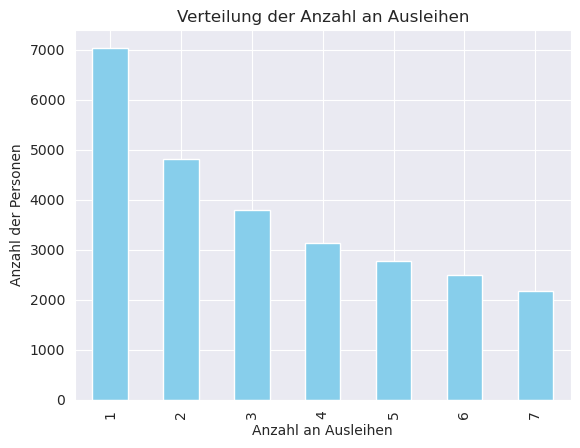

In [91]:
## Erstellen Sie ein Histogramm mittels Pandas, welches die Verteilung der Ausleihen zwischen 
## 1 und 7 Ausleihen (jeweils inklusive) darstellt - also die Anzahl an Einträgen in 
## df_library_active
## mit Werten für "Total Checkouts" in diesem Bereich.
##
## Das Diagramm soll 7 Balken (Gruppen) besitzen (je einen für 
## 1 Ausleihe, 2 Ausleihen, 3 Ausleihen, usw.
##
## Speichern Sie eine Referenz auf die erstellte Grafik in der Variable hist_lib1


filtered_data = df_library_usage[(df_library_usage['Total Checkouts'] >= 1) & 
                                   (df_library_usage['Total Checkouts'] <= 7)]

hist_lib1 = filtered_data['Total Checkouts'].value_counts().sort_index().plot(kind='bar', color='skyblue')

# wir sorgen noch für eine korrekte Beschriftung der Achsen und der Grafik 
# ("Anzahl" braucht keine Einheiten)
plt.title('Verteilung der Anzahl an Ausleihen')
plt.xlabel('Anzahl an Ausleihen')
plt.ylabel('Anzahl der Personen')
    
hist_lib1

In [92]:
assert hist_lib1 is not None



_Damit sollten wir ein ungefähres Bild der Situation haben, und den Kindern etwas Anreiz bieten können :-)_

## Wirtschaftsdaten (Korrelation von Werten)

Zum Abschluss untersuchen wir die Korrelation zwischen verschiedenen Werten. Dazu verwenden wir einen Datensatz mit einigen ökonomischen Kenngrößen. Jeder Eintrag im Datensatz entspricht dabei einem Tag. 

_Hinweis:_ Sie müssen die Bedeutung der einzelnen Merkmale nicht verstehen, um die Aufgabe zu lösen. Es ist vielleicht ein bisschen interessanter, wenn man eine ungefähre Ahnung hat was was ist, aber wenn nicht, löst sich die Aufgabe genauso.

**Beschreibung der Daten:**

- __Gold__: Goldpreis (in USD)
- __Monthly Inflation Rate__: Die Inflationsrate in den USA im entsprechenden Monat (Prozent)
- __EFFR Rate__: _Effective Federal Funds Rate_ - aus getätigten Transaktionen berechnete Zinsrate: [Details](https://www.newyorkfed.org/markets/reference-rates/effr) (Prozent)
- __Volume__: Umfang der getätigten Transaktionen (Mrd. USD)
- __Treasury Par Yield Month__: Rendite von US Anleihen mit 1 Monat Laufzeit (Prozent)
- __Treasury Par Yield Two Year__: Rendite von US Anleihen mit 2 Jahren Laufzeit (Prozent)
- __Treasury Par Yield Ten Year__: Rendite von US Anleihen mit 10 Jahren Laufzeit (Prozent)
- __DXY__: Stand des US Dollar Index - Kennzahl welche den Preis des US Dollars mit anderen Währungen vergleicht (Index)
- __SP Open__: Der Preis des S&P 500 Aktienindex bei Börsenöffnung (Index)
- __VIX__: Wert des _Volatility Index_ bei Börsenöffnung (Index)
- __Crude__: Rohölpreis (USD)


**Quelle:**

Wir verwenden den Datensatz von [https://www.kaggle.com/datasets/cvergnolle/gold-price-and-relevant-metrics](https://www.kaggle.com/datasets/cvergnolle/gold-price-and-relevant-metrics). 
Die Korrektheit der Daten kann nicht überprüft werden, einzelne Stichproben waren aber korrekt. <br/>
Der Datensatz wurde um einige Merkmale reduziert und einige der Merkmale wurden umbenannt.



In [93]:
economy_data_path = 'EconomyIndicators.csv'

df_eco = pd.read_csv(economy_data_path, sep=';')
df_eco

,Gold,Monthly Inflation Rate,EFFR Rate,Volume,Treasury Par Yield Month,Treasury Par Yield Two Year,Treasury Par Yield Ten Year,DXY,SP Open,VIX,Crude
0,2385.83,3.0,5.33,96,5.50,4.00,3.96,103.37,5293.13,24.77,72.84
1,2384.90,3.0,5.33,89,5.50,3.99,3.90,102.78,5206.42,33.71,73.86
2,2405.87,3.0,5.33,86,5.52,3.89,3.78,103.22,5151.14,23.39,74.21
3,2442.74,3.0,5.33,89,5.54,3.88,3.80,104.31,5376.63,20.52,76.87
4,2447.17,3.0,5.33,83,5.55,4.16,3.99,104.07,5537.84,16.20,78.59
...,...,...,...,...,...,...,...,...,...,...,...
671,1796.41,7.5,0.10,71,0.05,0.87,1.76,96.26,4697.66,19.85,79.62
672,1791.61,7.5,0.10,73,0.04,0.88,1.73,96.20,4693.39,20.29,77.24
673,1810.28,7.5,0.10,74,0.05,0.83,1.71,96.31,4787.99,17.07,77.18
674,1813.88,7.5,0.10,74,0.06,0.77,1.66,96.19,4804.51,16.57,76.02


### Korrelationen berechnen

Im ersten Schritt berechnen wir die Korrelationskoeffizienten zwischen all diesen Werten. Wirtschaftstheorie und Beobachtungen in der Praxis haben einige Theorien darüber, wie manche dieser Werte zusammenhängen (sollten) - schauen wir, ob wir das in den Daten auch sehen.

In [94]:
## Erstellen Sie eine Korrelationsmatrix der Merkmale des DataFrames df_eco
## D.h. erstellen Sie ein DataFrame df_eco_correlation, welches als Zeilen und
## Spalten jeweils die Wirtschaftsdaten besitzt. 
## Jeder Eintrag des DataFrame gibt den Korrelationskoeffizienten zwischen 
## Zeilenindex und Spaltenindex an.

df_eco_correlation = df_eco.corr()

df_eco_correlation

,Gold,Monthly Inflation Rate,EFFR Rate,Volume,Treasury Par Yield Month,Treasury Par Yield Two Year,Treasury Par Yield Ten Year,DXY,SP Open,VIX,Crude
Gold,1.000000,-0.680608,0.538895,-0.174374,0.503755,0.339683,0.443558,-0.171748,0.880275,-0.617251,-0.287555
Monthly Inflation Rate,-0.680608,1.000000,-0.924661,-0.350066,-0.904120,-0.747705,-0.771065,-0.020878,-0.638454,0.856990,0.713150
EFFR Rate,0.538895,-0.924661,1.000000,0.493562,0.990241,0.905197,0.877972,0.268538,0.434938,-0.783700,-0.759207
Volume,-0.174374,-0.350066,0.493562,1.000000,0.514988,0.544966,0.376754,0.303198,-0.264866,-0.280591,-0.527315
Treasury Par Yield Month,0.503755,-0.904120,0.990241,0.514988,1.000000,0.925214,0.895184,0.330445,0.407180,-0.763626,-0.743014
Treasury Par Yield Two Year,0.339683,-0.747705,0.905197,0.544966,0.925214,1.000000,0.959008,0.562888,0.221277,-0.601565,-0.579823
Treasury Par Yield Ten Year,0.443558,-0.771065,0.877972,0.376754,0.895184,0.959008,1.000000,0.561860,0.347102,-0.597076,-0.497360
DXY,-0.171748,-0.020878,0.268538,0.303198,0.330445,0.562888,0.561860,1.000000,-0.227756,0.112096,-0.067345
SP Open,0.880275,-0.638454,0.434938,-0.264866,0.407180,0.221277,0.347102,-0.227756,1.000000,-0.681542,-0.272657
VIX,-0.617251,0.856990,-0.783700,-0.280591,-0.763626,-0.601565,-0.597076,0.112096,-0.681542,1.000000,0.637694


In [95]:
# Stimmt die generelle Struktur
assert df_eco_correlation["Gold"].dtype == np.float64, f'Merkmal Gold hat unerwareteten Datentyp: {df_eco_correlation["Gold"].dtype}'
assert len(df_eco_correlation.index) == 11, f'Matrix hat unerwartete Anzahl an Zeilen: {len(df_eco_correlation.index)}'
assert (df_eco_correlation.index.values == df_eco_correlation.columns.values).all(), f'Zeilenindex und Merkmalsnamen sollten ident sein'

# Bereich der Werte korrekt?
assert (-1 <= df_eco_correlation.all().all() <= 1)

# Zwei Werte zum Überprüfen
assert (abs(df_eco_correlation.loc["EFFR Rate", "Treasury Par Yield Ten Year"] - 0.877972) < 0.000001), \
            f'Korrelation von "EFFR Rate", "Treasury Par Yield Ten Year" hat unerwarteten Wert: '\
            f'{df_eco_correlation.loc["EFFR Rate", "Treasury Par Yield Ten Year"]}'
assert (abs(df_eco_correlation.loc["DXY", "Crude"] + 0.067345) < 0.000001), \
            f'Korrelation von "DXY", "Crude" hat unerwarteten Wert: '\
            f'{df_eco_correlation.loc["DXY", "Crude"]}'


### Werte identifizieren und finden

Die Korrelationsmatrix ist zwar vollständig und interessant, aber auch ein bisschen unübersichtlich. Wir suchen im nächsten Schritt daher sowohl die größte als auch kleinste Korrelation (jeweils positiv als auch negativ).

In [96]:
## Suchen Sie in df_eco_corr die folgenden Werte, und speichern Sie sie in die genannten Variablen:
## 1. den Wert der größten positiven Korrelation (max_pos_corr)
## 2. den Wert der kleinsten positiven Korrelation (min_pos_corr)
## 3. den Wert der kleinsten negativen Korrelation = jene negative Zahl am nächsten an 0 (min_neg_corr)
## 4. den Wert der größten negativen Korrelation = jene negative Zahl am weitesten von 0 (max_neg_corr)
##
## Alle Angaben suchen jeweils die Korrelation zwischen verschiedenen Merkmalen 
## (die 1-er aus der Diagonalen sollen also ignoriert werden)

max_pos_corr = df_eco_correlation[df_eco_correlation != 1].max().max()
min_pos_corr = df_eco_correlation[df_eco_correlation > 0].min().min()
max_neg_corr = df_eco_correlation[df_eco_correlation != -1].min().min()
min_neg_corr = df_eco_correlation[df_eco_correlation < 0].max().max()

print(f'Wert der größten positiven Korrelation: {max_pos_corr}')
print(f'Wert der kleinsten positiven Korrelation: {min_pos_corr}')
print(f'Wert der kleinsten negativen Korrelation: {min_neg_corr}')
print(f'Wert der größten negativen Korrelation: {max_neg_corr}')

Wert der größten positiven Korrelation: 0.9902409155816165
Wert der kleinsten positiven Korrelation: 0.11209573412597323
Wert der kleinsten negativen Korrelation: -0.020878441113974848
Wert der größten negativen Korrelation: -0.9246609426602315


In [97]:
assert 0 <= min_pos_corr < max_pos_corr < 1
assert -1 <= max_neg_corr < min_neg_corr <= 0


Wir möchten uns nun die Werte, welche diese größten/kleinsten Korrelationen aufweisen etwas genauer ansehen. Zum einen interessiert uns, wo diese Werte auftreten, und zum anderen möchten wir uns auch ansehen, was diese Werte heißen. Der Code für das Herausfiltern der jeweiligen Merkmale ist dabei bereits vorgegeben (bitte die Zelle ausführen, sonst fehlen die Ergebnisse später). 
Um etwas mehr über die Verteilung der Werte und ihrer Beziehung untereinander zu verstehen, werden wir diese Verteilungen mittels Scatterplots und Histogrammen visualisieren.

```max_pos_features```, ```min_pos_features```, ```max_neg_features``` und ```min_neg_features``` enthalten die Paare aus jenen Merkmalen, welche den jeweiligen Korrelationskoeffizienten (größten positiven, kleinsten negativen, ...) darstellen.

Mittels z.B. ```max_pos_features[0]``` und ```max_pos_features[1]``` kann also auf die beiden Merkmale zugegriffen werden.

Verwenden Sie diese Werte, um im Anschluss die geforderten Plots zu erstellen.

In [98]:
## Erklärung: 
## - Mit df_eco_correlation == max_pos_corr erhalten wir ein DataFrame der selben Struktur wie df_eco_correlation mit True an jenen Stellen an denen die maximale Korrelation auftritt, und False an allen anderen Stellen
## - (df_eco_correlation == max_pos_corr).any() gibt dann ein Series Objekt mit einem Eintrag für jede SPALTE zurück. Dieser ist True wenn die Spalte in df_eco_correlation == max_pos_corr mindestens ein True enthält, sonst False
## - Da die Spalten und Zeilen die selben Indizes benützen, können wir das Series Objekt aus dem letzten Schritt verwenden um Zeilen aus df_eco_correlation auszuwählen - nämlich jene, die mindestens ein True enthalten.
## - Das Resultat ist dann ein DataFrame mit 2 Zeilen - deren Index sind genau die beiden Merkmalsnamen, welche die gesuchte Korrelation aufweisen 
## Anmerkung: Funktioniert nicht, wenn mehrere Kombinationen die selbe Korrelation erzeugen
## Anmerkung2: Es gäbe auch noch eine Vielzahl an anderen Wegen dies zu bewerkstelligen. Auf diese Art kommen wir nur mit DataFrame Operationen aus, welche entsprechend optimiert sind.

max_pos_features = tuple(df_eco_correlation[(df_eco_correlation == max_pos_corr).any()].index)
min_pos_features = tuple(df_eco_correlation[(df_eco_correlation == min_pos_corr).any()].index)
min_neg_features = tuple(df_eco_correlation[(df_eco_correlation == min_neg_corr).any()].index)
max_neg_features = tuple(df_eco_correlation[(df_eco_correlation == max_neg_corr).any()].index)

print(f'Größte positive Korrelation ist zwischen  :  {max_pos_features[0]:>23}   und {max_pos_features[1]:>27}.')
print(f'Kleinste positive Korrelation ist zwischen:  {min_pos_features[0]:>23}   und {min_pos_features[1]:>27}.')
print(f'Kleinste negative Korrelation ist zwischen:  {min_neg_features[0]:>23}   und {min_neg_features[1]:>27}.')
print(f'Größte negative Korrelation ist zwischen  :  {max_neg_features[0]:>23}   und {max_neg_features[1]:>27}.')

Größte positive Korrelation ist zwischen  :                EFFR Rate   und    Treasury Par Yield Month.
Kleinste positive Korrelation ist zwischen:                      DXY   und                         VIX.
Kleinste negative Korrelation ist zwischen:   Monthly Inflation Rate   und                         DXY.
Größte negative Korrelation ist zwischen  :   Monthly Inflation Rate   und                   EFFR Rate.


### Visualisierungen

Wir wollen einige dieser am stärksten/schwächsten korrelierten Werte nun weiter beobachten, indem wir Scatterplots und Histogramme zur Verteilung der Merkmale anlegen.

Wir beginnen, indem wir uns Scatterplots sehr stark sowie sehr schwach korrelierter Werte ansehen.

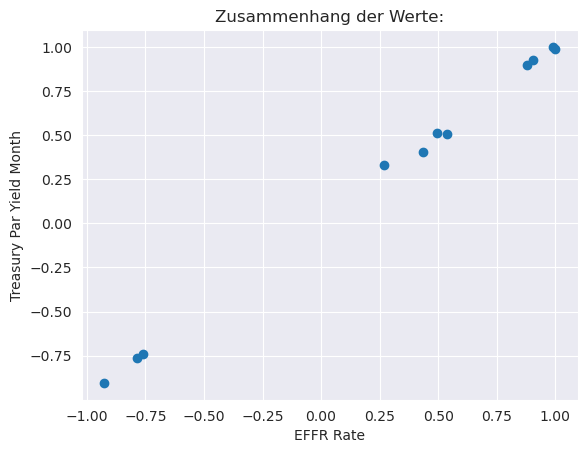

In [99]:
## Erstellen Sie einen Scatterplot, welcher den Zusammenhang zwischen den beiden 
## Kenngrößen mit dem höchsten positiven Korrelationskoeffizienten darstellt.
## Speichern Sie den Rückgabewert des plot Aufrufs in der Variable scatter1 
##
## ACHTUNG! Plotten Sie die tatsächlichen Werte der Merkmale, nicht die 
## Korrelationskoeffizienten!

scatter1 = plt.scatter(df_eco_correlation[max_pos_features[0]], df_eco_correlation[max_pos_features[1]])

# Korrekte Beschriftung der Axen (wir lassen die Einheiten weg, damit wir 
# Bezeichnungen dynamisch übernehmen können)
plt.xlabel(max_pos_features[0])
plt.ylabel(max_pos_features[1])
plt.title('Zusammenhang der Werte:')

scatter1

In [100]:
assert scatter1 is not None


Versuchen Sie, das Ergebnis des Plots für sich zu interpretieren: 
- Was sagt der Plot? (Woran erkennt man die positive Korrelation?)
- Warum gibt es diese Lücken auf der x-Achse, obwohl die Werte der _EFFR Rate_ eigentlich kontinuierlich sind?
- Was fällt Ihnen sonst noch auf?

(Keine Abgabe der Antwort notwendig)

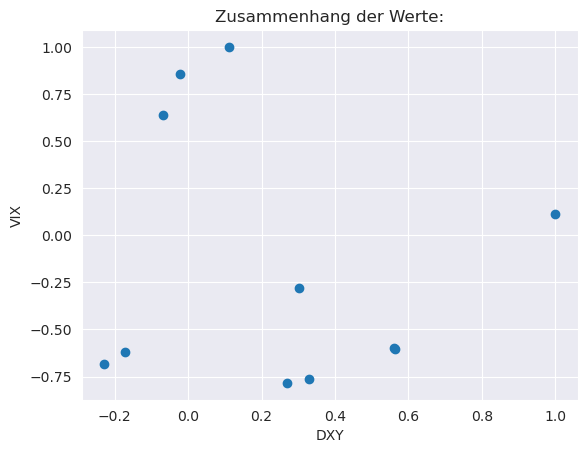

In [101]:
## Erstellen Sie einen Scatterplot, welcher den Zusammenhang zwischen den beiden 
## Kenngrößen mit dem kleinsten positiven Korrelationskoeffizienten darstellt.
## Speichern Sie den Rückgabewert des plot Aufrufs in der Variable scatter2 
##
## ACHTUNG! Plotten Sie die tatsächlichen Werte der Merkmale, nicht die 
## Korrelationskoeffizienten!

scatter2 = plt.scatter(df_eco_correlation[min_pos_features[0]], df_eco_correlation[min_pos_features[1]])

# Korrekte Beschriftung der Axen (wir lassen die Einheiten weg, damit wir 
# Bezeichnungen dynamisch übernehmen können)
plt.xlabel(min_pos_features[0])
plt.ylabel(min_pos_features[1])
plt.title('Zusammenhang der Werte:')

scatter2

Um noch mehr Informationen zu erhalten - und vielleicht auch um den recht dichten "Knödel" an Punkten unten in der Mitte aufzulösen, erstellen wir zusätzlich für jeden der beiden im Scatterplot dargestellten Werte ein Histogramm, welches die Verteilung des einzelnen Merkmals beschreibt.

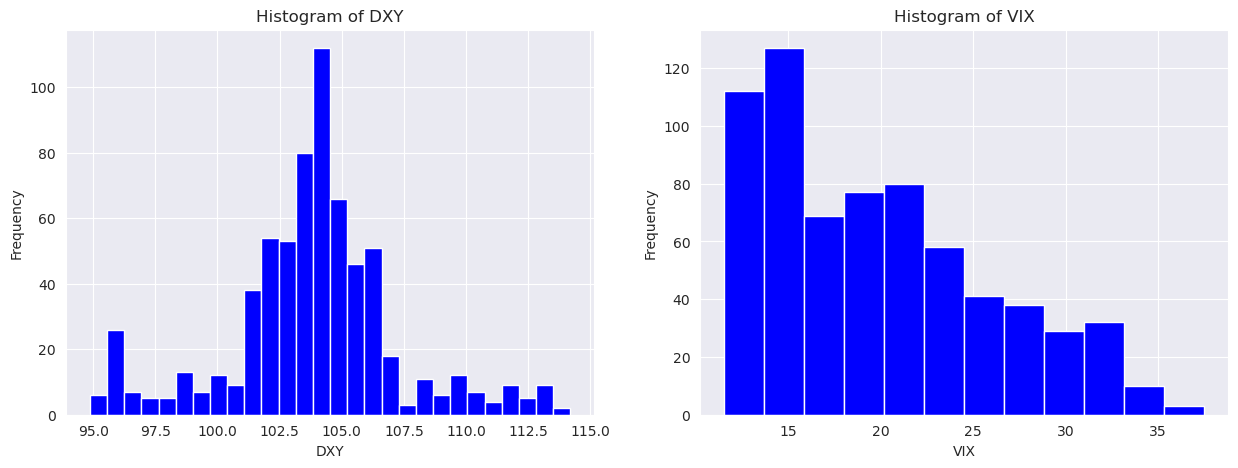

In [102]:
## Erstellen Sie Histogramme für alle Merkmale in min_pos_features
## Speichern Sie die Rückgabe-Werte der plot Aufrufe in hist1 
## bei mehreren Aufrufen als Liste oder array

hist1 = []

num_features = len(min_pos_features)
cols = 2  
rows = (num_features // cols) + (num_features % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten() 

for idx, feature in enumerate(min_pos_features):
    ax = axes[idx]
    hist = ax.hist(df_eco[feature], bins='auto', color='blue')
    ax.set_title(f"Histogram of {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Frequency")
    hist1.append(hist)

In [103]:
assert scatter2 is not None
assert hist1 is not None



Interpretieren Sie wiederum den Scatterplot sowie die beiden Histogramme. 
- Was sagen sie aus?
- Wie hängen sie zusammen/wie lässt sich ein Zusammenhang zwischen den Grafiken herstellen?
- Fällt Ihnen sonst noch etwas auf?

(Keine Abgabe einer Antwort notwendig)

Für den dritten Scatterplot betrachten wir nun noch die beiden Merkmale, die am stärksten negativ korreliert sind.

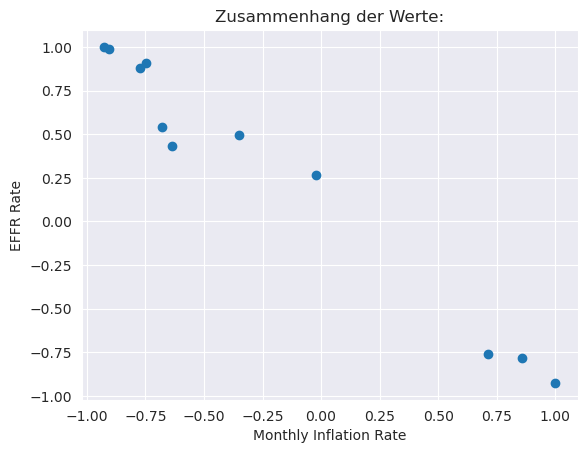

In [104]:
## Erstellen Sie einen Scatterplot, welcher den Zusammenhang zwischen den beiden 
## Kenngrößen mit dem stärksten negativen Korrelationskoeffizienten darstellt.
## Speichern Sie den Rückgabewert des plot Aufrufs in der Variable scatter3

scatter3 = plt.scatter(df_eco_correlation[max_neg_features[0]], df_eco_correlation[max_neg_features[1]])

# Korrekte Beschriftung der Axen (wir lassen die Einheiten weg, damit wir 
# Bezeichnungen dynamisch übernehmen können)
plt.xlabel(max_neg_features[0])
plt.ylabel(max_neg_features[1])
plt.title('Zusammenhang der Werte:')

scatter3

In [105]:
assert scatter3 is not None


Zum Abschluss erstellen wir noch eine Scatterplotmatrix für sämtliche Merkmale des Datensatzes (__Achtung!__ Die Berechnung kann einige Zeit dauern. Nicht die Geduld/Nerven verlieren :-) )

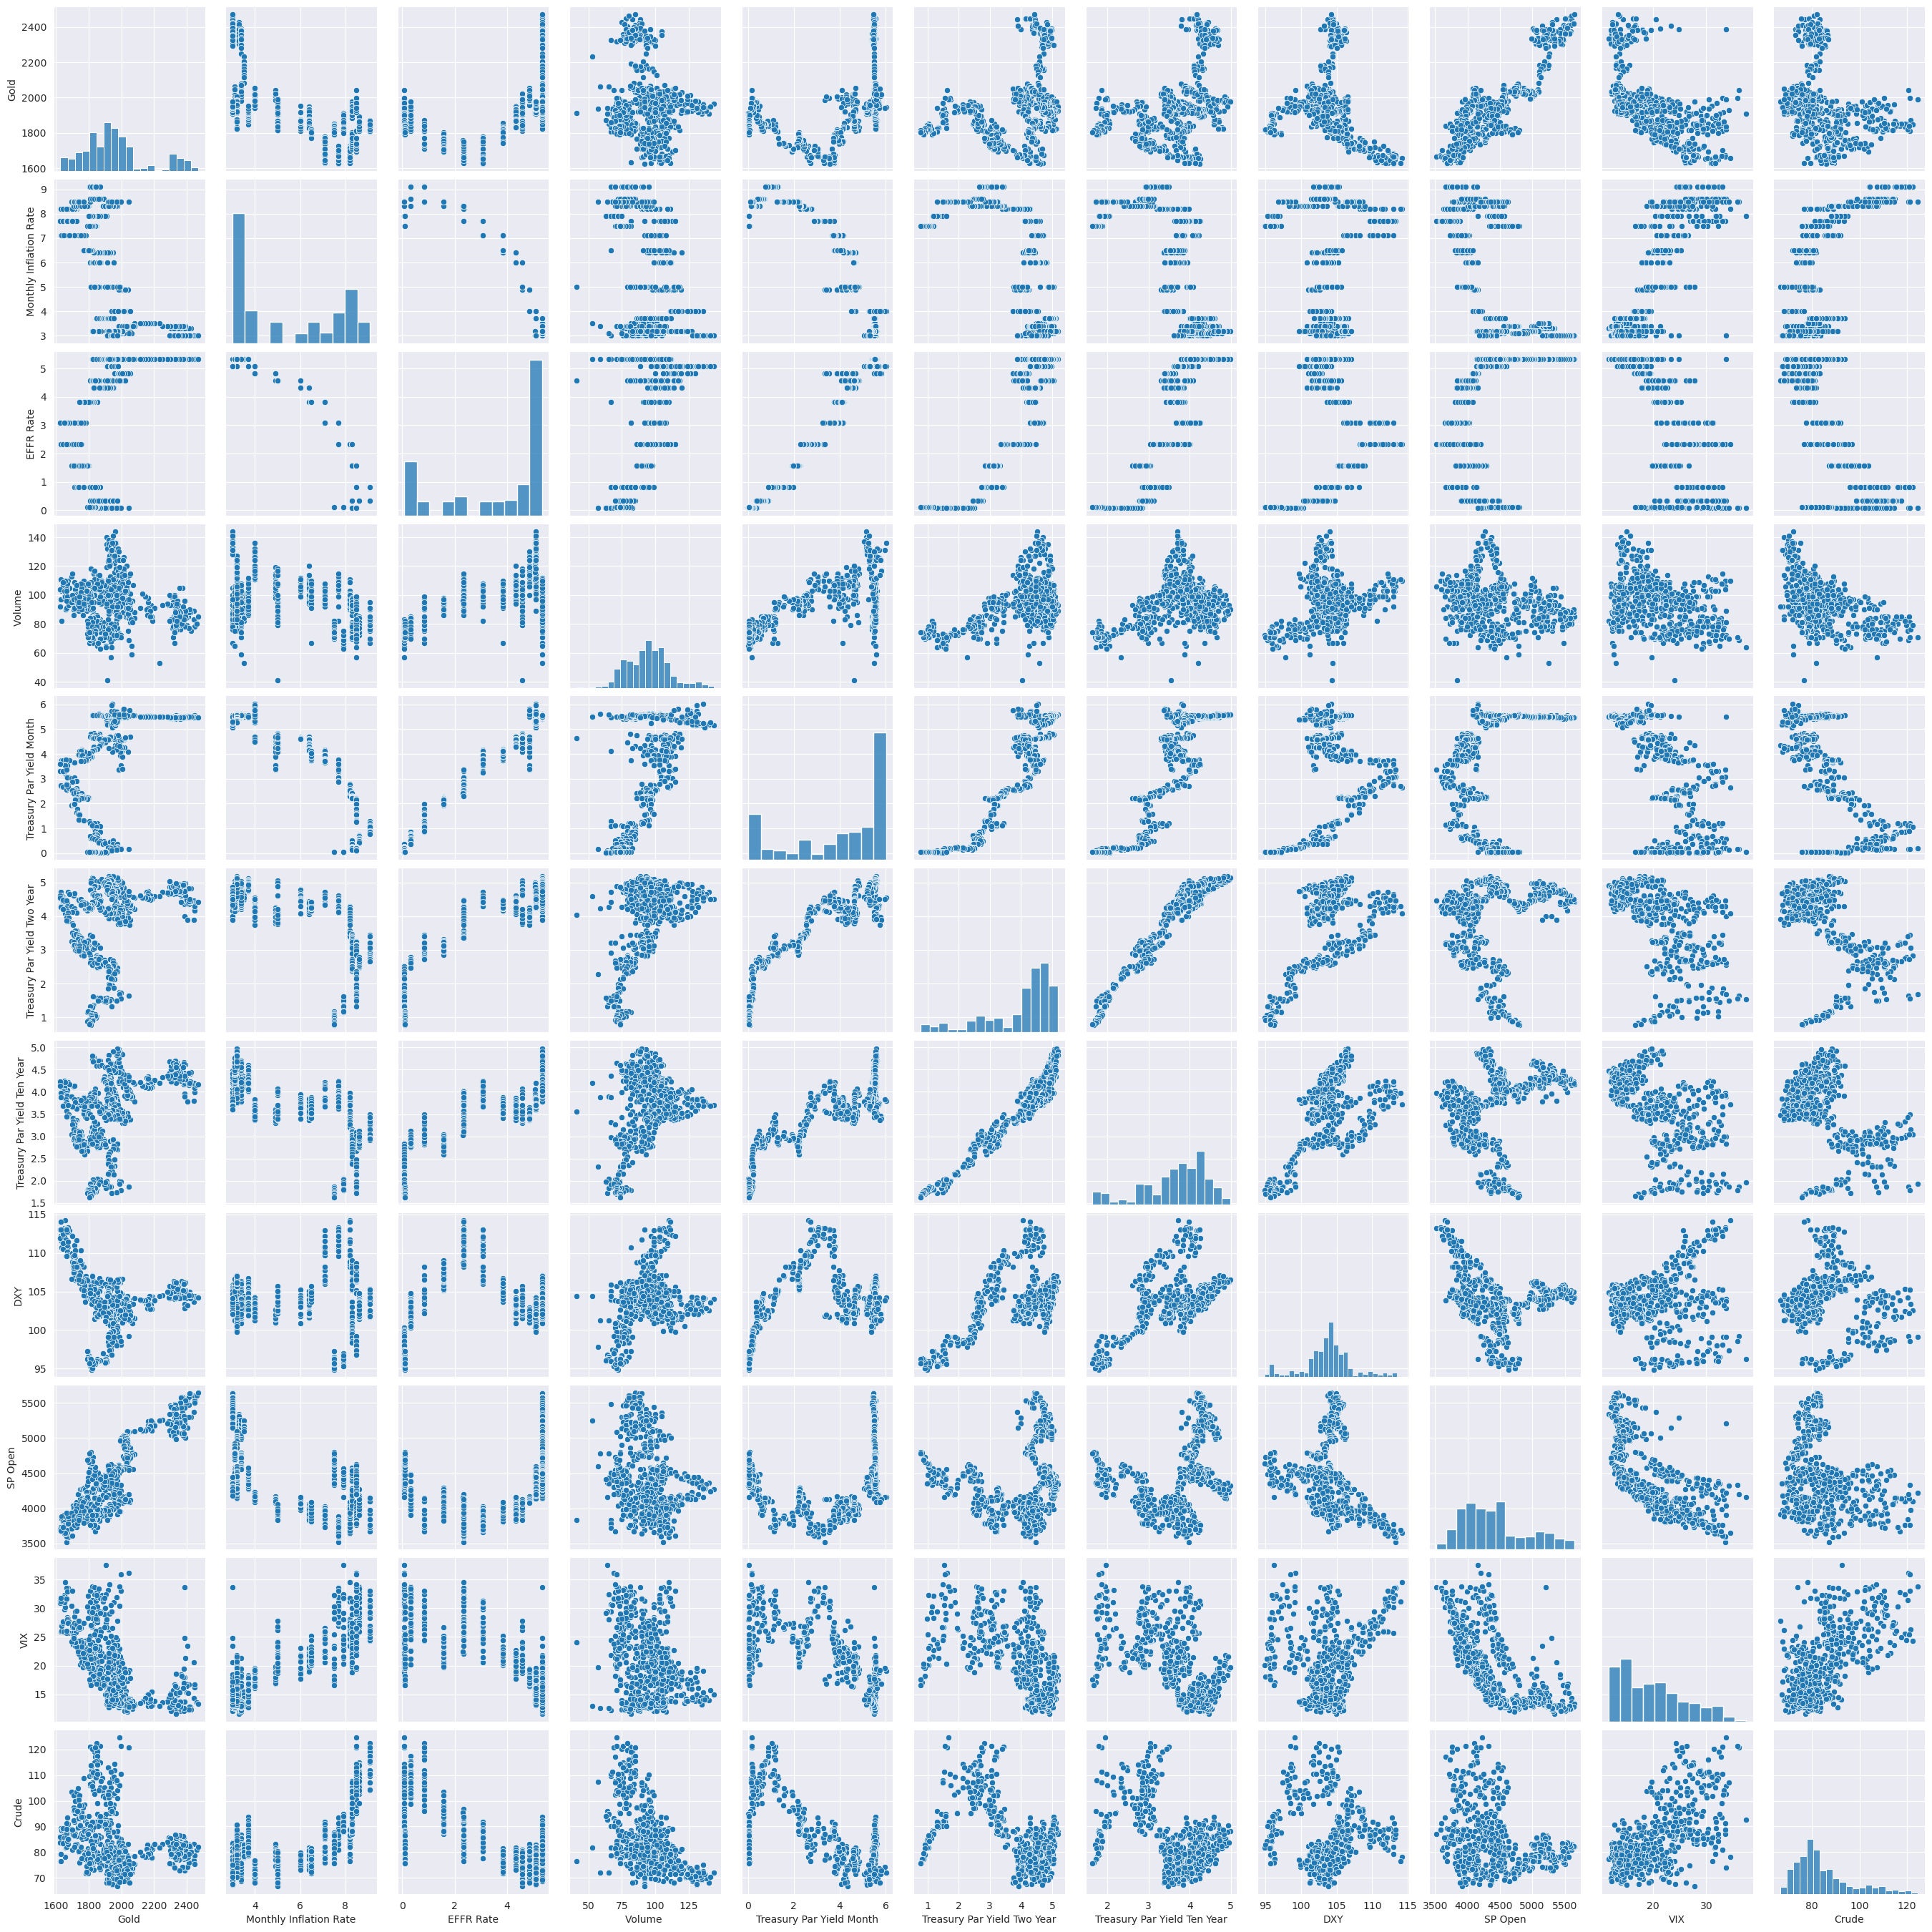

In [106]:
## Erstellen Sie eine Scatterplotmatrix der Werte in df_eco
## Wie in der Vorlesung gezeigt, verwenden Sie dazu die pairplot Funktion in seaborn.
## In der Diagonale sollen Histogramme erstellt werden. 

# Hinweis: Die Berechnung der Matrix kann bereits für diesen kleinen Datensatz ein paar Sekunden dauern. 
# Nach dem Ausführen der Zelle also etwas Geduld haben, bis der Plot erscheint.

scp_matrix = sns.pairplot(df_eco)

scp_matrix

In [107]:
assert scp_matrix is not None


## Ende
Damit haben Sie auch das 2. Übungsblatt fertig durchgearbeitet. Gratulation :-) 

Bitte melden Sie sich bei Fragen, Problemen oder Unklarheiten rechtzeitig.